In [1]:
from graph_traffic.custom_transformer import get_column_names
from graph_traffic.merge_data import mapping
from graph_traffic.regression import train_with_args, coefs_plot
from graph_traffic.model_selection import get_node_ids, get_random_sample
from graph_traffic.config import project_path
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
import pickle
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
mpl.rcParams['axes.grid'] = False

C:\Users\Bened\PycharmProjects\madrid-traffic\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Which sensors to use?
We have previously saved the nuber of observations in each sensor: `ocupacion_data_sizes.pkl`.
We first get those that have more than 80000 rows.

In [2]:
ids_to_use = get_node_ids()

In [3]:
mapping[mapping.id_t.isin(ids_to_use)].iloc[:, 1:].apply(lambda x: pd.value_counts(x))

,id_temperatura,id_humedad_relativa,id_presion_barometrica,id_radiacion_solar,id_precipitacion,id_dir_viento,id_velocidad_viento
18.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
24.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN
56.0,NaN,37.0,37.0,NaN,37.0,37.0,37.0


## First model

In [4]:
data_dict = dict(
    ids_list=ids_to_use,#[1001],#[3532, 3542, 3544, 3545, 3546, 3577, 3637, 3640, 3641, 4761, 4763],
    seq_len=4*24,
    with_graph=False,
    from_date="2019-01-01",
    to_date="2021-12-31",
    dataset_name="small",
    target="ocupacion",
    interactions="drop"
)

meteo_dict = {
    'rain': 'numerico_power',
    'wind': 'drop',
    'temperature': 'passthrough',
    'humidity': 'passthrough',
    'pressure': 'drop',
    'radiation': 'passthrough'
}

temporal_dict= {
    'year': 'passthrough',
    'season': 'ordinal',
    'month': 'passthrough',
    'day_of_month': 'passthrough',
    'weekday': 'drop',
    'hour': 'one_hot',
    'minute': 'drop',
    'bank_holiday': 'passthrough',
    'school_holiday': 'drop',
    'working_day': 'passthrough',
    'state_of_alarm': 'passthrough'
}

train_until = "2021-05-27"

pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("RidgeRegression", RidgeCV())
])

In [6]:
maes1_total = dict()
mses1_total = dict()
for train_until in pd.date_range("2021-05-27", "2021-11-30", freq="1M"):
    print(train_until)
    ids_used1, estimators1, dfs_dict1, maes1, mses1 = train_with_args(data_dict, meteo_dict, temporal_dict, pipeline, train_until=train_until)
    maes1_total[train_until] = maes1
    mses1_total[train_until] = mses1

    with open(f"{project_path}/training_history/regression/final/first/maes1.pkl", "wb") as f:
        pickle.dump(maes1_total, f)

    with open(f"{project_path}/training_history/regression/final/first/mses1.pkl", "wb") as f:
        pickle.dump(mses1_total, f)

2021-05-31 00:00:00
5126
Shape of train predictors and labels: (79411, 35) (79411,)
MAE: 8.80658950438823
MSE: 134.01406689795002
9847
Shape of train predictors and labels: (78862, 35) (78862,)
MAE: 4.086026332047129
MSE: 31.33311151323546
5045
Shape of train predictors and labels: (78226, 35) (78226,)
MAE: 3.131444795368533
MSE: 14.54283675128764
3685
Shape of train predictors and labels: (77685, 35) (77685,)
MAE: 2.283172194850885
MSE: 8.576786584002523
5046
Shape of train predictors and labels: (77486, 35) (77486,)
MAE: 3.0489231396416527
MSE: 15.904503189247192
5125
Shape of train predictors and labels: (77384, 35) (77384,)
MAE: 7.742404539053618
MSE: 109.56932131944676
5061
Shape of train predictors and labels: (75707, 35) (75707,)
MAE: 2.2354206017939413
MSE: 8.935943078317363
5122
Shape of train predictors and labels: (75095, 35) (75095,)
MAE: 2.42884497212719
MSE: 9.635443052418767
5245
Shape of train predictors and labels: (76973, 35) (76973,)
MAE: 6.439883346928533
MSE: 108.3

ValueError: Found array with 0 sample(s) (shape=(0, 35)) while a minimum of 1 is required by StandardScaler.

In [ ]:
plt.hist(mses1.values(), bins=10)
plt.title("MSE, first regression")
plt.show()

In [ ]:
random_samples = get_random_sample(test_dates, data_dict["seq_len"], 1)
random_samples

In [ ]:
random_samples = [1592]

In [ ]:
column_names1 = get_column_names(meteo_dict, temporal_dict, "drop", data_dict["target"])[1:]

## Second model

In [16]:
data_dict = dict(
    ids_list=ids_to_use,#[1001],#[3532, 3542, 3544, 3545, 3546, 3577, 3637, 3640, 3641, 4761, 4763],
    seq_len=4*24,
    with_graph=False,
    from_date="2019-01-01",
    to_date="2021-12-31",
    dataset_name="small",
    target="ocupacion",
    interactions="drop"
)

meteo_dict = {
    'rain': 'ordinal',
    'wind': 'drop',
    'temperature': 'passthrough',
    'humidity': 'passthrough',
    'pressure': 'drop',
    'radiation': 'passthrough'
}

temporal_dict= {
    'year': 'passthrough',
    'season': 'ordinal',
    'month': 'passthrough',
    'day_of_month': 'fourier',
    'weekday': 'passthrough',
    'hour': 'spline',
    'minute': 'passthrough',
    'bank_holiday': 'passthrough',
    'school_holiday': 'drop',
    'working_day': 'passthrough',
    'state_of_alarm': 'passthrough'
}
maes2_total = dict()
mses2_total = dict()
for train_until in pd.date_range("2021-05-27", "2021-11-30", freq="1M"):
    print(train_until)
    ids_used2, estimators2, dfs_dict2, maes2, mses2 = train_with_args(data_dict, meteo_dict, temporal_dict, pipeline, train_until=train_until)
    maes2_total[train_until] = maes2
    mses2_total[train_until] = mses2

    with open(f"{project_path}/training_history/regression/final/second/maes2.pkl", "wb") as f:
        pickle.dump(maes2_total, f)

    with open(f"{project_path}/training_history/regression/final/second/mses2.pkl", "wb") as f:
        pickle.dump(mses2_total, f)

2021-05-31 00:00:00
5126
Shape of train predictors and labels: (79411, 26) (79411,)
MAE: 8.783887061170901
MSE: 133.12865652354907
9847
Shape of train predictors and labels: (78862, 26) (78862,)
MAE: 4.08224504305471
MSE: 31.69834635136228
5045
Shape of train predictors and labels: (78226, 26) (78226,)
MAE: 3.13526664130268
MSE: 14.510737283072823
3685
Shape of train predictors and labels: (77685, 26) (77685,)
MAE: 2.2649903617454967
MSE: 8.4839266096657
5046
Shape of train predictors and labels: (77486, 26) (77486,)
MAE: 3.041738830314674
MSE: 15.780477622961751
5125
Shape of train predictors and labels: (77384, 26) (77384,)
MAE: 7.714984121580136
MSE: 108.97510453588546
5061
Shape of train predictors and labels: (75707, 26) (75707,)
MAE: 2.2266074419227877
MSE: 8.880603834942097
5122
Shape of train predictors and labels: (75095, 26) (75095,)
MAE: 2.427326921581601
MSE: 9.617820757536752
5245
Shape of train predictors and labels: (76973, 26) (76973,)
MAE: 6.4814206061571165
MSE: 108.4

In [52]:
pd.date_range("2021-05-27", "2021-12-31", freq="1M")

DatetimeIndex(['2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [41]:
maes_per_sensor1 = {}
for sensor in data_dict["ids_list"]:
    maes_per_sensor1[sensor] = [x[sensor] for x in maes1_total.values()]
maes_per_sensor1 = pd.DataFrame(maes_per_sensor1, index=["Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]).T
maes_per_sensor1["avg"] = maes_per_sensor1.mean(axis=1)
maes_per_sensor1["std"] = maes_per_sensor1.std(axis=1)
maes_per_sensor1 = maes_per_sensor1.round(4)
maes_per_sensor1.to_csv(f"{project_path}/training_history/regression/final/first/maes_per_sensor.csv")
maes_per_sensor1

,Jun,Jul,Aug,Sep,Oct,Nov,Dec,avg,std
5126,8.8066,8.9191,9.1342,9.2234,9.2001,8.7326,8.9705,8.9981,0.1790
9847,4.0860,4.0885,4.1587,4.2706,4.2571,4.2320,4.2897,4.1975,0.0796
5045,3.1314,3.1409,3.1699,3.0016,3.2372,3.2923,3.0771,3.1501,0.0895
3685,2.2832,2.3026,2.3317,2.2503,2.2953,2.3190,2.3590,2.3059,0.0325
5046,3.0489,3.0203,2.8799,2.5694,2.6125,2.4320,2.5483,2.7302,0.2299
5125,7.7424,7.8598,8.0369,8.0559,8.0775,7.9740,8.0158,7.9660,0.1130
5061,2.2354,2.2684,2.3046,2.2843,2.3241,2.3433,2.4907,2.3215,0.0766
5122,2.4288,2.3513,2.2064,2.0102,1.9615,1.9586,1.9334,2.1215,0.1906
5245,6.4399,6.0839,5.6806,5.3517,5.3968,5.0978,4.8381,5.5555,0.5166
5047,1.9408,1.9717,2.0332,2.0060,2.0325,2.0212,2.0805,2.0123,0.0420


In [42]:
maes_per_sensor2 = {}
for sensor in data_dict["ids_list"]:
    maes_per_sensor2[sensor] = [x[sensor] for x in maes2_total.values()]
maes_per_sensor2 = pd.DataFrame(maes_per_sensor2, index=["Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]).T
maes_per_sensor2["avg"] = maes_per_sensor2.mean(axis=1)
maes_per_sensor2["std"] = maes_per_sensor2.std(axis=1)
maes_per_sensor2 = maes_per_sensor2.round(4)
maes_per_sensor2.to_csv(f"{project_path}/training_history/regression/final/second/maes_per_sensor.csv")
maes_per_sensor2

,Jun,Jul,Aug,Sep,Oct,Nov,Dec,avg,std
5126,8.7839,8.8928,9.1111,9.2086,9.1994,8.7573,8.9683,8.9888,0.1744
9847,4.0822,4.0826,4.1477,4.2539,4.2445,4.2191,4.2736,4.1862,0.0753
5045,3.1353,3.1559,3.1813,3.0213,3.2677,3.3273,3.1225,3.1730,0.0927
3685,2.2650,2.2889,2.3167,2.2325,2.2763,2.2947,2.3401,2.2877,0.0324
5046,3.0417,3.0158,2.8708,2.5570,2.5996,2.4213,2.5508,2.7225,0.2307
5125,7.7150,7.8337,8.0148,8.0501,8.0714,7.9843,8.0179,7.9553,0.1215
5061,2.2266,2.2621,2.2982,2.2774,2.3163,2.3371,2.4834,2.3144,0.0767
5122,2.4273,2.3504,2.2044,2.0081,1.9580,1.9576,1.9299,2.1194,0.1912
5245,6.4814,6.1418,5.7229,5.3888,5.4246,5.1351,4.9005,5.5993,0.5164
5047,1.9286,1.9635,2.0249,1.9943,2.0268,2.0214,2.0853,2.0064,0.0467


In [50]:
maes_merged = pd.merge(maes_per_sensor1[["avg", "std"]], maes_per_sensor2[["avg", "std"]], left_index=True, right_index=True)
maes_merged.index = maes_merged.index.rename("Sensor")
maes_merged.columns = ["Average 1", "Standard Deviation 1", "Average 2", "Standard Deviation 2"]
maes_merged = maes_merged.sort_index()
maes_merged.to_csv(f"{project_path}/training_history/regression/final/maes_per_sensor.csv")
maes_merged

,Average 1,Standard Deviation 1,Average 2,Standard Deviation 2
Sensor,,,,
3481,4.7001,0.0636,4.6928,0.0667
3572,2.0719,0.0721,2.0606,0.0742
3576,3.9488,0.5565,3.9238,0.5637
3628,2.4624,0.1038,2.4484,0.1060
3684,2.0599,0.3402,2.0605,0.3366
3685,2.3059,0.0325,2.2877,0.0324
3686,3.8052,0.0527,3.7894,0.0514
5044,1.1771,0.0416,1.1665,0.0413
5045,3.1501,0.0895,3.1730,0.0927


In [51]:
mses_per_sensor1 = {}
for sensor in data_dict["ids_list"]:
    mses_per_sensor1[sensor] = [x[sensor] for x in mses1_total.values()]
mses_per_sensor1 = pd.DataFrame(mses_per_sensor1, index=["Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]).T
mses_per_sensor1["avg"] = mses_per_sensor1.mean(axis=1)
mses_per_sensor1["std"] = mses_per_sensor1.std(axis=1)
mses_per_sensor1 = mses_per_sensor1.round(4)
mses_per_sensor1.to_csv(f"{project_path}/training_history/regression/final/first/mses_per_sensor.csv")

mses_per_sensor2 = {}
for sensor in data_dict["ids_list"]:
    mses_per_sensor2[sensor] = [x[sensor] for x in mses2_total.values()]
mses_per_sensor2 = pd.DataFrame(mses_per_sensor2, index=["Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]).T
mses_per_sensor2["avg"] = mses_per_sensor2.mean(axis=1)
mses_per_sensor2["std"] = mses_per_sensor2.std(axis=1)
mses_per_sensor2 = mses_per_sensor2.round(4)
mses_per_sensor2.to_csv(f"{project_path}/training_history/regression/final/second/mses_per_sensor.csv")

mses_merged = pd.merge(mses_per_sensor1[["avg", "std"]], mses_per_sensor2[["avg", "std"]], left_index=True,
                       right_index=True)
mses_merged.index = mses_merged.index.rename("Sensor")
mses_merged.columns = ["Average 1", "Standard Deviation 1", "Average 2", "Standard Deviation 2"]
mses_merged = mses_merged.sort_index()
mses_merged.to_csv(f"{project_path}/training_history/regression/final/mses_per_sensor.csv")
mses_merged

,Average 1,Standard Deviation 1,Average 2,Standard Deviation 2
Sensor,,,,
3481,47.9129,0.9667,47.6591,0.9760
3572,12.6817,1.1644,12.5893,1.1505
3576,57.0953,26.4470,56.7194,26.3900
3628,15.2274,1.1577,15.1576,1.1654
3684,23.8838,14.3378,23.9012,14.3567
3685,8.8470,0.2226,8.7540,0.2149
3686,23.0059,0.5245,22.8232,0.4558
5044,3.4769,0.6371,3.4506,0.6379
5045,14.7923,0.8666,14.9038,0.8406


,Average 1,Standard Deviation 1,Average 2,Standard Deviation 2
Sensor,,,,
5126,8.9981,0.1790,8.9888,0.1744
9847,4.1975,0.0796,4.1862,0.0753
5045,3.1501,0.0895,3.1730,0.0927
3685,2.3059,0.0325,2.2877,0.0324
5046,2.7302,0.2299,2.7225,0.2307
5125,7.9660,0.1130,7.9553,0.1215
5061,2.3215,0.0766,2.3144,0.0767
5122,2.1215,0.1906,2.1194,0.1912
5245,5.5555,0.5166,5.5993,0.5164


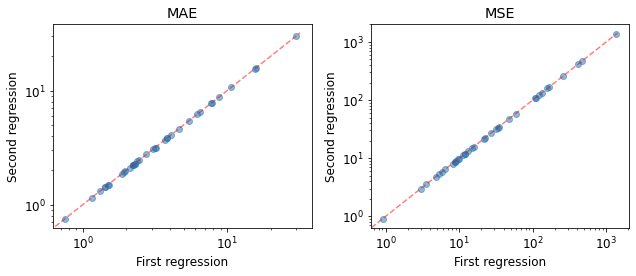

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
ax[0].scatter(maes1.values(), maes2.values(), alpha=0.5)
ax[0].set_title("MAE")
ax[0].set_xlabel("First regression")
ax[0].set_ylabel("Second regression")
ax[0].plot([0, 32], [0, 32], "--", color="red", alpha=0.5)
ax[0].set_xscale("log")
ax[0].set_yscale("log")

ax[1].scatter(mses1.values(), mses2.values(), alpha=0.5)
ax[1].set_title("MSE")
ax[1].set_xlabel("First regression")
ax[1].set_ylabel("Second regression")
ax[1].plot([0, 1420], [0, 1420], "--", color="red", alpha=0.5)
ax[1].set_xscale("log")
ax[1].set_yscale("log")

fig.tight_layout()
plt.show()

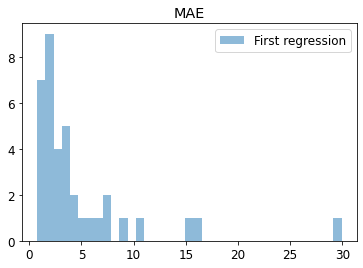

In [22]:
plt.hist(maes1.values(), bins=37, label="First regression", alpha=0.5)
plt.hist(maes2.values(), bins=37, label="Second regression", alpha=0.5)
plt.title("MAE")
plt.legend()
plt.show()

In [ ]:
plt.hist(mses2.values(), bins=10)
plt.title("MSE, second regression")
plt.show()

In [10]:
column_names2 = get_column_names(meteo_dict, temporal_dict, "drop", data_dict["target"])[1:]

In [11]:
ids_used2

[4959, 5131, 4958, 5123, 5126]

In [12]:
estimators1[4959]

Pipeline(steps=[('scaler', StandardScaler()),
                ('RidgeRegression', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

## Plot comparing both models

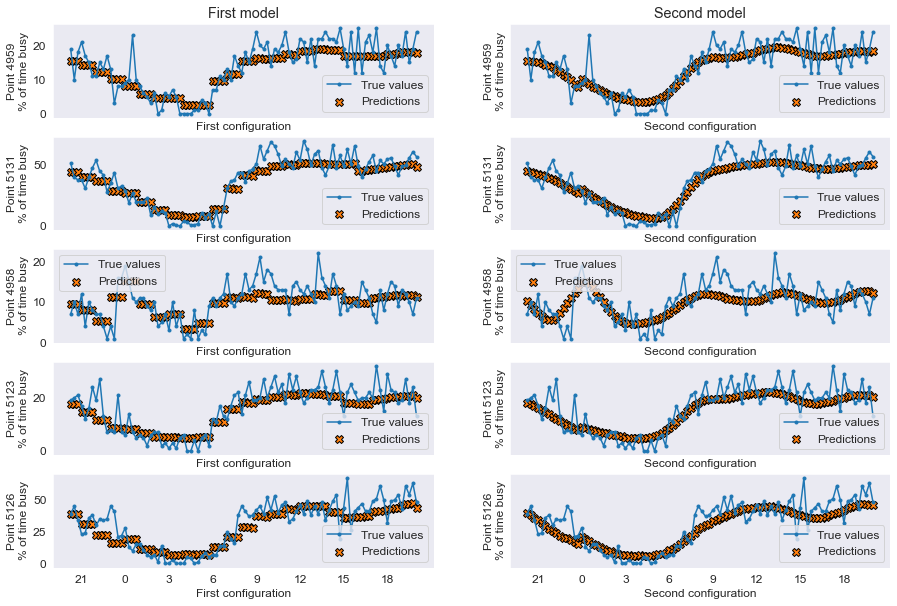

In [13]:
fig, axs = plt.subplots(len(ids_used1), 2, figsize=(15, len(ids_used1)*2), sharex="col",
                       sharey="row")
data_size = list(dfs_dict2.values())[0].shape[0]
if len(data_dict["ids_list"]) == 1:
    axs = [axs]
sample = random_samples[0]
timestamps = np.copy(test_dates[sample:sample+data_dict['seq_len']])
for k, t in enumerate(timestamps[1:]):
    if timestamps[k] > t:
        timestamps[k+1] = timestamps[k+1] + 24
for j, sensor in enumerate(ids_used1):
    # first model
    test_x1 = dfs_dict1[sensor][int(0.8 * data_size):, 1:]
    test_y1 = dfs_dict1[sensor][int(0.8 * data_size):, 0].ravel()

    true_values = test_y1[sample:sample+data_dict['seq_len']]
    pred = estimators1[sensor].predict(test_x1[sample:sample+data_dict['seq_len']])
    axs[j][0].plot(timestamps, true_values, marker=".", label="True values")
    axs[j][0].scatter(timestamps, pred, marker="X", edgecolors='k', label='Predictions',
                              c='#ff7f0e', s=64)
    axs[j][0].set_xticks(timestamps, [f"{t % 24:.0f}" for t in timestamps])
    axs[j][0].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[j][0].set_xlabel(f"First configuration")
    axs[j][0].set_ylabel(f"Point {sensor}\n% of time busy")
    axs[j][0].legend()
    axs[0][0].set_title("First model")
    # second model
    test_x2 = dfs_dict2[sensor][int(0.8 * data_size):, 1:]
    test_y2 = dfs_dict2[sensor][int(0.8 * data_size):, 0].ravel()

    true_values = test_y2[sample:sample+data_dict['seq_len']]
    pred = estimators2[sensor].predict(test_x2[sample:sample+data_dict['seq_len']])
    axs[j][1].plot(timestamps, true_values, marker=".", label="True values")
    axs[j][1].scatter(timestamps, pred, marker="X", edgecolors='k', label='Predictions',
                              c='#ff7f0e', s=64)
    axs[j][1].set_xticks(timestamps, [f"{t % 24:.0f}" for t in timestamps])
    axs[j][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[j][1].set_xlabel(f"Second configuration")
    axs[j][1].set_ylabel(f"Point {sensor}\n% of time busy")
    axs[j][1].legend()
    axs[0][1].set_title("Second model")

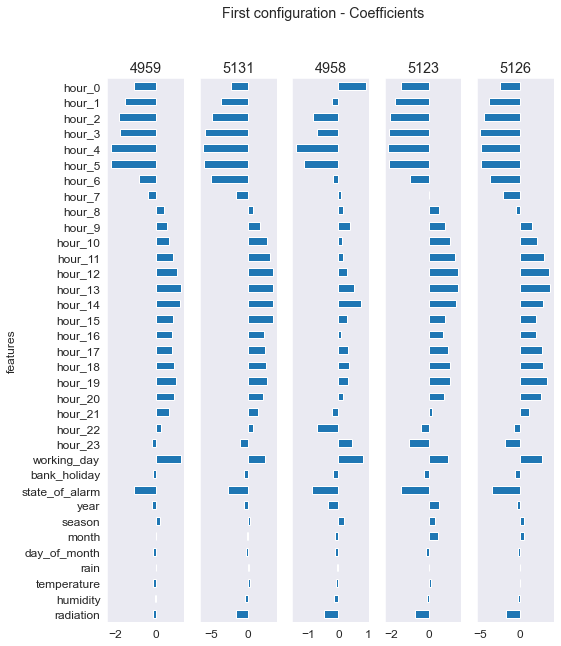

In [14]:
coefs_plot(ids_used1, estimators1, column_names1, title="First configuration - Coefficients")

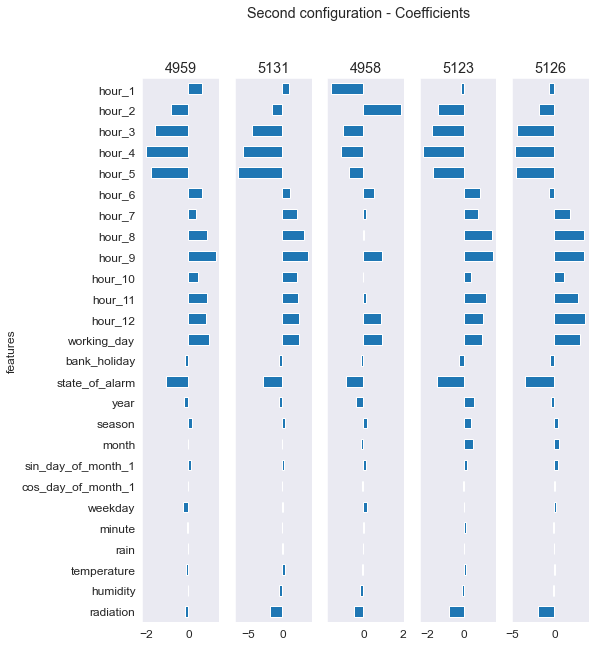

In [15]:
coefs_plot(ids_used2, estimators2, column_names2, title="Second configuration - Coefficients")

Find datetime of the samples

In [16]:
sample = random_samples[0]
pd.DataFrame(test_x1[sample:sample+data_dict['seq_len']], columns= column_names1)[["hour_21", "year", "month", "day_of_month"]]

,hour_21,year,month,day_of_month
0,0.0,2021.0,6.0,13.0
1,0.0,2021.0,6.0,13.0
2,0.0,2021.0,6.0,13.0
3,1.0,2021.0,6.0,13.0
4,1.0,2021.0,6.0,13.0
...,...,...,...,...
91,0.0,2021.0,6.0,14.0
92,0.0,2021.0,6.0,14.0
93,0.0,2021.0,6.0,14.0
94,0.0,2021.0,6.0,14.0


In [23]:
estimators1[4959][1].alpha_

10.0

In [25]:
[estimator[1].alpha_ for estimator in estimators1.values()]

[10.0, 10.0, 10.0, 10.0, 10.0]

In [27]:
[estimator[1].alpha_ for estimator in estimators2.values()]

[10.0, 10.0, 10.0, 10.0, 10.0]